In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import easyocr

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import os
from pathlib import Path
import cv2



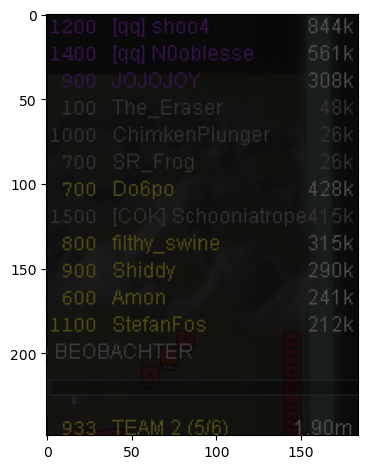

In [136]:

pfad = r"pictures/screenshot_20250911_025258.png"

img = mpimg.imread(pfad)
height, width, _ = img.shape

crop_top = int(height * 0.07)  #  oben
crop_bottom = int(height * (1 - 0.7))  #  unten
crop_left = int(width * 0.775)  #  links
crop_right = int(width * (1 - 0.129))  #  rechts


# Bild zuschneiden
cropped_img = img[crop_top:crop_bottom, crop_left:crop_right]


scaled_img = (cropped_img * 255).astype(np.uint8)
new_image = cv2.convertScaleAbs(scaled_img, alpha=0.3, beta=1)
plt.imshow(new_image)
cv2.imwrite("pictures/cropped.png", cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR))  # Konvertiere zurück zu BGR für OpenCV
# Plot anzeigen
plt.tight_layout()
plt.show()

In [140]:
reader = easyocr.Reader(['en'], gpu=True)  # Initialisiere den OCR-Leser
result = reader.readtext(new_image, allowlist='0123456789km')  

In [141]:
for res in result:
    print(res[0][0][0],"/",res[0][1][0]," --- ",res[1])  

1 / 33  ---  1200
37 / 99  ---  44k8k004
153 / 184  ---  844k
9 / 33  ---  400
39 / 125  ---  441km38
153 / 184  ---  561k
9 / 33  ---  900
37 / 93  ---  880
153 / 184  ---  308k
7 / 33  ---  100
37 / 107  ---  kk1kmkm
161 / 184  ---  48k
3 / 135  ---  10008kmk2km8m
161 / 184  ---  26k
9 / 33  ---  700
161 / 184  ---  26k
9 / 33  ---  700
39 / 79  ---  600
153 / 184  ---  428k
9 / 184  ---  50060k80kmm8415k
7 / 33  ---  800
37 / 105  ---  3m5mmk
153 / 184  ---  315k
7 / 33  ---  900
39 / 79  ---  8k
153 / 184  ---  290k
7 / 33  ---  600
37 / 73  ---  4mm
153 / 184  ---  241k
1 / 97  ---  11008mm608
153 / 184  ---  212k
3 / 88  ---  81084643
7 / 33  ---  933
37 / 73  ---  76km
83 / 111  ---  65861
155 / 183  ---  4m
61.44529980377477 / 90.95506413681123  ---  610


In [142]:
data = pd.DataFrame(columns=["elo", "name", "power"])
i = 0

#res[0][1][0] == 184 für ende der schrift, machmal nur 175  

i = 0
count =0
while True:
    if i >= len(result):
        break
    if result[i][0][1][0] == np.int32(184) or result[i][0][1][0] == np.int32(175) or result[i][0][1][0] == np.int32(177):
        print(result[i][1])
        count +=1
    
    i+=1
    

# DataFrame ausgeben
print("count:",count)

844k
561k
308k
48k
26k
26k
428k
50060k80kmm8415k
315k
290k
241k
212k
count: 12
